In [1]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sb #for plotting graphs

from pylab import rcParams

# DATA DESCRIPTION

In [2]:
%matplotlib inline
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1.0,2.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


#### This dataset has 303 samples, and 14 attributes( 13 int and 1 float)

#### Description of the 14 attributes
**age**: age in years of the patient

**sex**: sex of patient (1 = male; 0 = female)

**cp**: chest pain type. 
+ Value 0: typical angina 
+ Value 1: atypical angina
+ Value 2: non-anginal pain
+ Value 3: asymptomatic

**trestbps**:resting blood pressure (in mm Hg on admission to the hospital)

**chol**:serum cholestoral in mg/dl

**fbs**:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg**: resting electrocardiographic results
+ Value 0: normal
+ Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
+ Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**exang**:exercise induced angina (1 = yes; 0 = no)

**oldpeak**:ST depression induced by exercise relative to rest

**slope**:the slope of the peak exercise ST segment
+ Value 0: upsloping
+ Value 1: flat
+ Value 2: downsloping

**ca**:number of major vessels (0-3) colored by flourosopy

**thal**: 1 = normal; 2 = fixed defect; 3 = reversable defect, blood disorder

**target**: 0 = disease, 1 = no disease

In [5]:
#prints the types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

# DATA CLEANING

In [6]:
#is there any missing values
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
target      False
dtype: bool

In [7]:
#return columns names with number of NaN values in particular column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

#### We are missing some values for the columns Ca and Thal

In [8]:
##object_name.dropna(), drops all rows that contain any missing values
newData=data.dropna()

#### Decided to drop the records that had missing values for Ca and Thal

In [9]:
#So we droped al the rows that contained any missing values
newData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# DESCRIPTIVE STATISTICS

In [10]:
#There two types of patients those who have the disease
# and those who have no disease, so we grouby target: 0 = disease, 1 = no disease
target = newData.groupby('target')
#averages of both groups
target.mean()
#what do the averages tell us about the patients?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.735294,0.823529,0.485294,134.463235,251.463235,0.147059,0.448529,138.948529,0.544118,1.600735,1.169118,1.154412,2.558824
1,52.643750,0.556250,1.362500,129.175000,243.493750,0.143750,0.587500,158.581250,0.143750,0.598750,1.587500,0.275000,2.131250


#### Analysis from the averages:
+ For both targets the average age is in the 50ths. 
+ trestbps(resting blood pressure) is on average 134.46 mm Hg for somone with heart disease and 129.18 mm Hg with no heart disease. 
+ chol(cholestorel) is on average 251.46 mg/dl for someone with heart disease and 243.49 mg/dl with no heart disease.
+ thalach(max heart rate achived) is on average 138.94 bpm for someone with heart disease and 158.58 bpm with no heart disease. 

In [11]:
# 136 patients have heart disease
# 160 patients have no heart disease 
newData['target'].value_counts()

1    160
0    136
Name: target, dtype: int64

#### 136 patients have heart disease
#### 160 patients have no heart disease

In [12]:
newData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


<function matplotlib.pyplot.savefig(*args, **kwargs)>

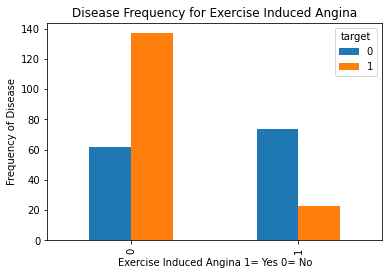

In [13]:
#Data Visualization 

%matplotlib inline 
# plot a bar graph using Matplotlib 
import matplotlib.pyplot as plt
pd.crosstab(newData.exang, newData.target).plot(kind='bar')
plt.title('Disease Frequency for Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina 1= Yes 0= No')
plt.ylabel('Frequency of Disease')
plt.savefig

**Based on the bar chart perople wihoit Excercise angina are less likely to have heart disease. While people with
excercise induced angina are more like to have heart disease.**

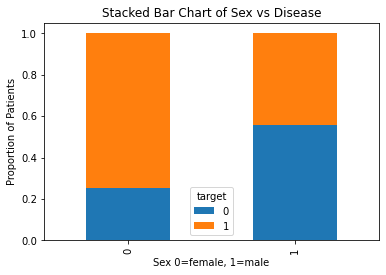

In [14]:
# target: 0 = disease, 1 = no disease
table=pd.crosstab(newData.sex, newData.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sex vs Disease')
plt.xlabel('Sex 0=female, 1=male')
plt.ylabel('Proportion of Patients')
plt.savefig('sex_bar_chart')

#### Males have higher chance of getting disease according to the stacked bar chart

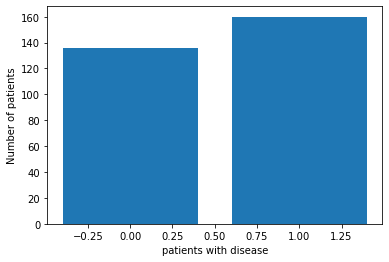

In [15]:
target_count=newData.groupby('target').count()
plt.bar(target_count.index.values, target_count['chol'])
plt.xlabel('patients with disease')
plt.ylabel('Number of patients')
plt.show()


In [16]:
newData.target.value_counts()

1    160
0    136
Name: target, dtype: int64

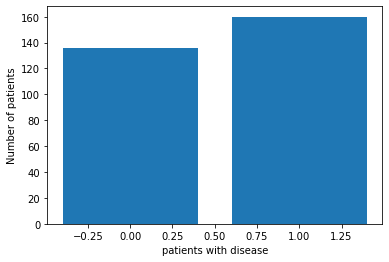

In [17]:
plt.bar(target_count.index.values, target_count['trestbps'])
plt.xlabel('patients with disease')
plt.ylabel('Number of patients')
plt.show()

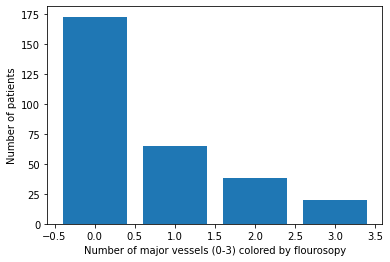

In [18]:
#INTRESTING
num_ca= newData.groupby('ca').count()
plt.bar(num_ca.index.values, num_ca['chol'])
plt.xlabel('Number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Number of patients')
plt.show()

#### Number of of people with 0 major vessels are more likely to have cholesterol. 

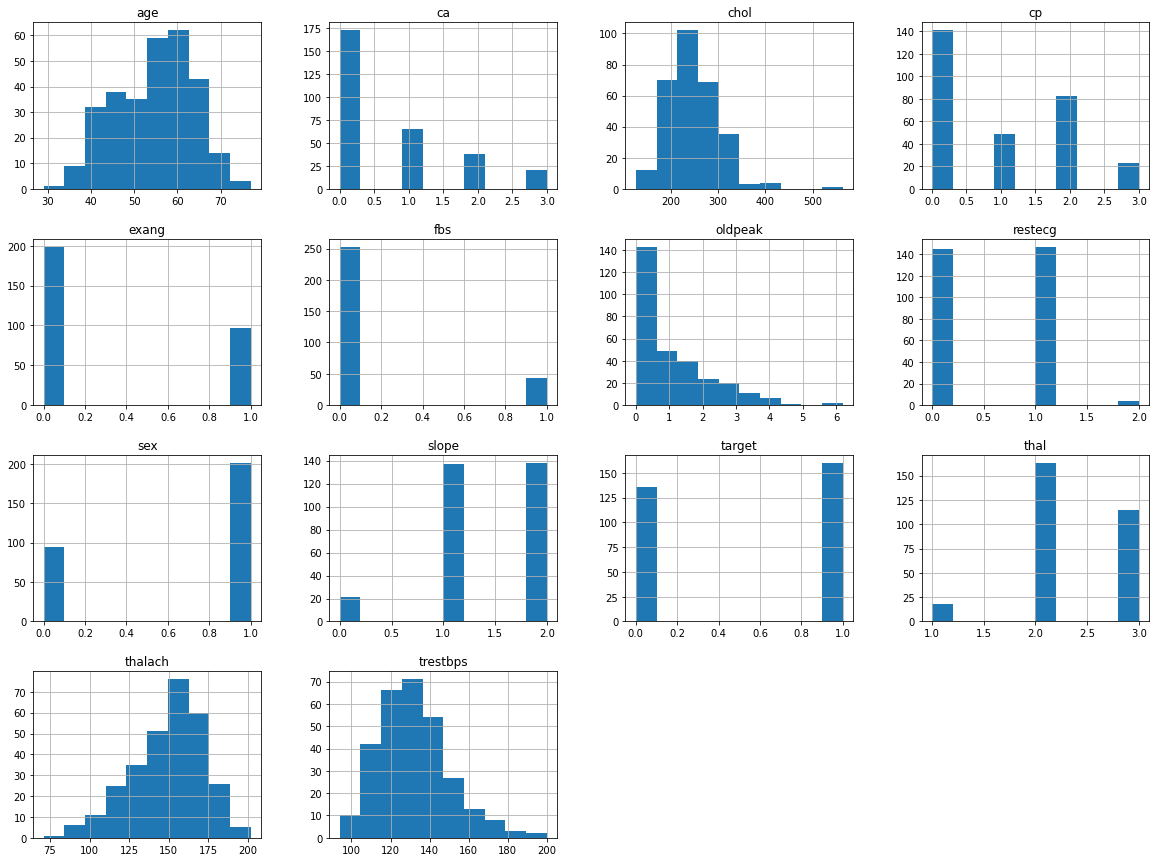

In [19]:
num_bins = 10
newData.hist(bins=num_bins, figsize=(20,15))
plt.savefig("heart_histogram_plots")
plt.show()


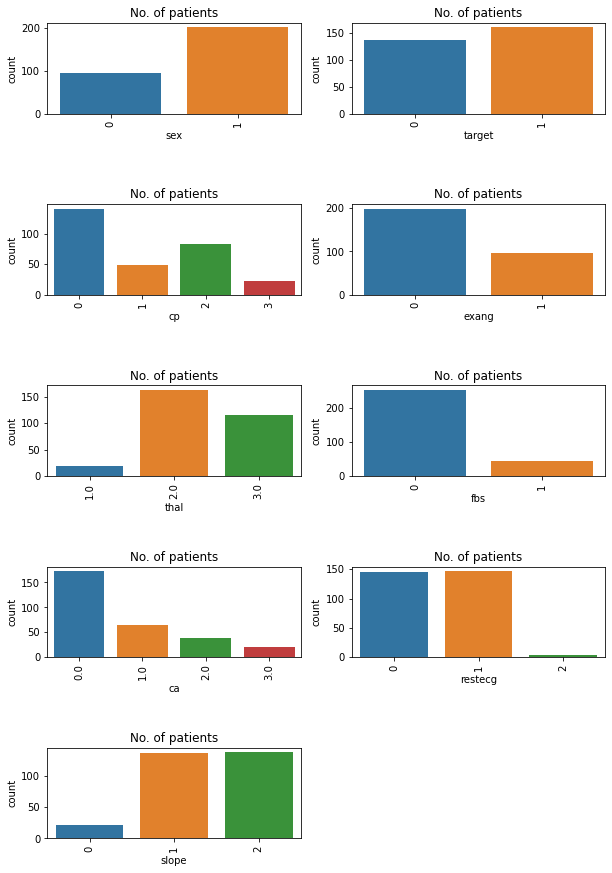

In [20]:
## Displaying count for each attribute
#in features just added the sttributes that are categorical
features=['sex','target','cp','exang','thal','fbs','ca','restecg', 'slope']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sb.countplot(x=j,data = newData)
    plt.xticks(rotation=90)
    plt.title("No. of patients")


#### Counts for each attribute
+ **sex**: The number of male patients is higher than female patients
+ **cp**: Most patients have typical angina type of chest pain
+ **exang**: Mpst patients do not have excercise agina
+ **thal**: Most patients have a thal of 2 and greater
+ **fbs**: Most patients do not have a fastign blood sugar greater than 120 mg/dl
+ **ca**: Most patients have a zero major vessel
+ **restecg**: Most have a normal and ST-wave abnormality resting electrocardiographic results
+ **slope**: Most patients flat and downslopping peak exercise ST segment

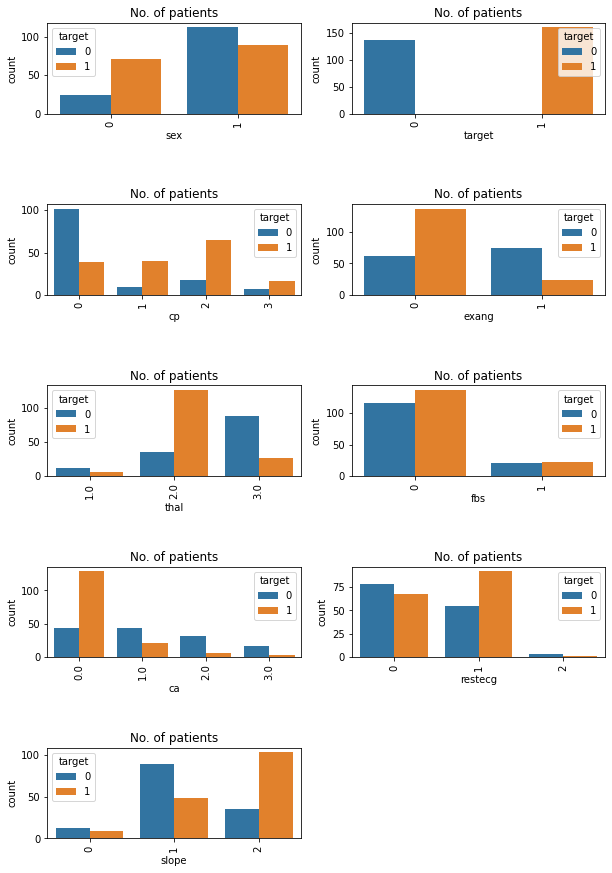

In [21]:
#Counts for atributes based on target label
# target: 0 = disease, 1 = no disease
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sb.countplot(x=j,data = newData, hue='target')
    plt.xticks(rotation=90)
    plt.title("No. of patients")


#### analysis of these plots
+ **sex**: males are likely to have the disease
+ **target**: in the data, there are more pateints without diesease. 1-160, 0-136
+ **cp**: most people with diesease experience chest pain type 0 (typical angina)
+ **exang**: most patients did not experience induced angina, those who did not were mostly healthy
+ **thal(blood disorder)**: from normal to reversable effect, the number of patients with disease increases 
+ **fbs(fasting blood sugar > 120 mg/dl)**: fbs is not a good indicator 
+ **ca(Number of major vessels (0-3) colored by flourosopy)**:
+ **restecg**: most patients with disease had normal restecg. Restecg is not correlated with heart disease. 
+ **slope(the slope of the peak exercise ST segment)**: A larger number of patients with no heart disease have a downsloping peak excercise ST segment. Patients with heart disease have a flat slope. 


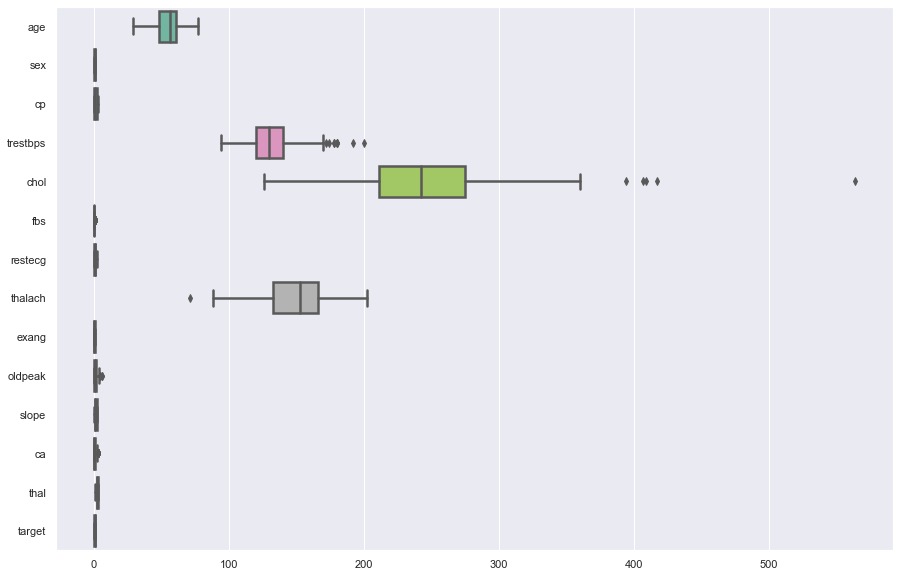

In [22]:
plt.figure(figsize=(15,10))
sb.set(color_codes=True)
sb.boxplot(data=newData, orient='h', palette = 'Set2',linewidth=2.5)

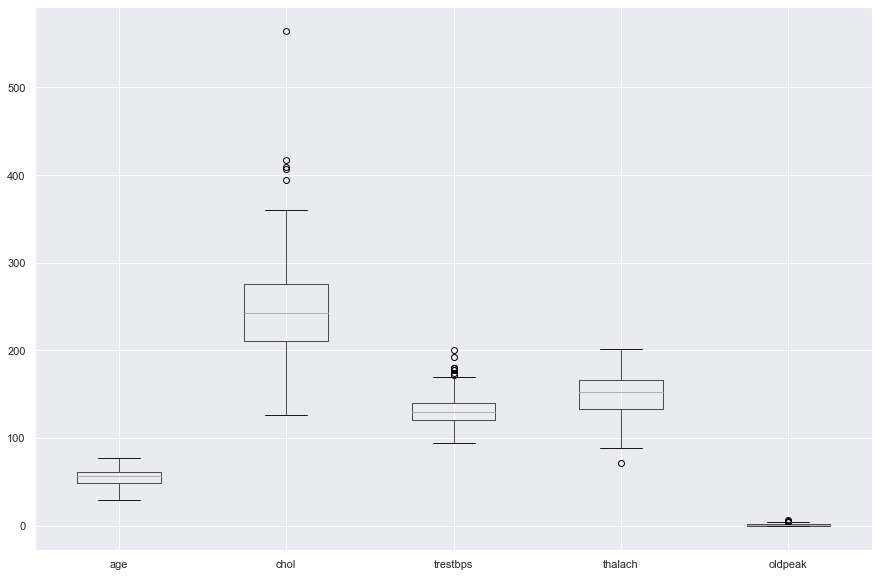

In [23]:
numericalData = ['age', 'chol', 'trestbps','thalach', 'oldpeak']
plt.figure(figsize=(15,10))
newData.boxplot(numericalData)

#### There are outliers for chol, trestbps, and thalach

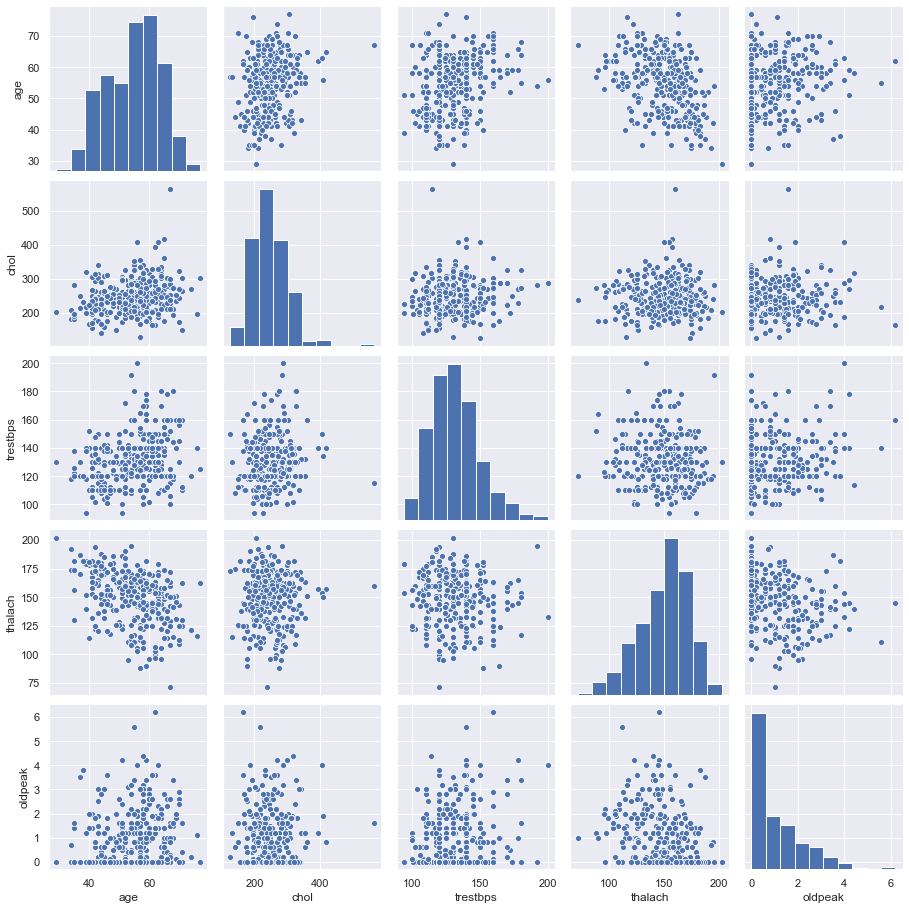

In [24]:
#do scatter plots and distributions for analyzing the attributes that are numerical
X = newData[['age', 'chol', 'trestbps','thalach', 'oldpeak']]
sb.pairplot(X)

#### Dont see any linear correlation among the numerical data. 

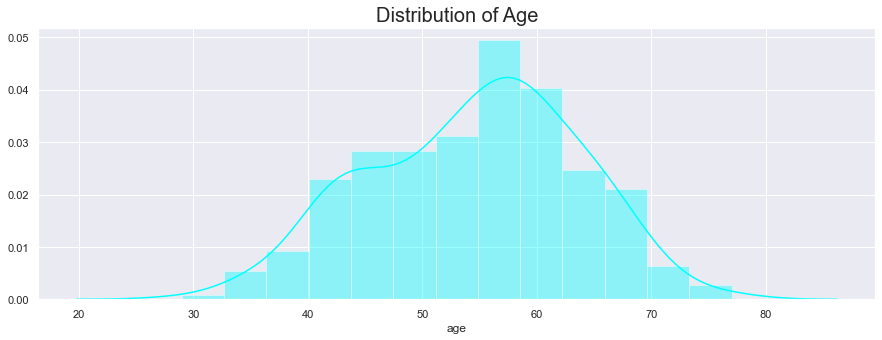

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
sb.distplot(newData['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

#### The distribution is skewed to the left, which indicates most patients are middle agged and above. Specifically in the age group of 55-65 years

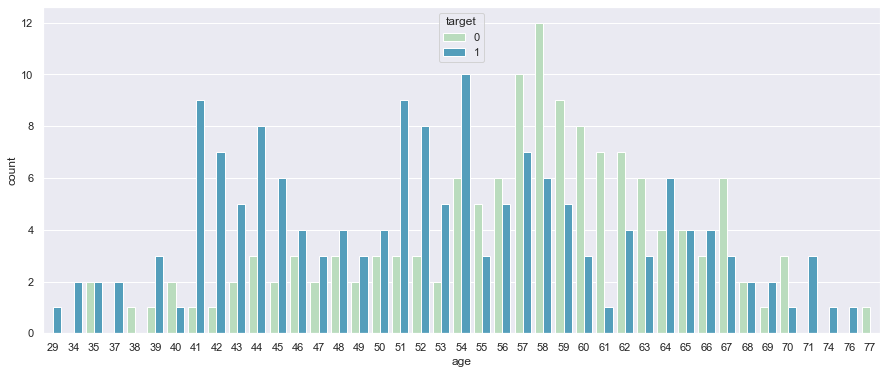

In [26]:
plt.figure(figsize=(15,6))
sb.countplot(x='age',data = newData, hue = 'target',palette='GnBu')
plt.show()

#### Most patients that have heart disease are in their 50s

# PREPROCESSING

In [27]:
x = newData.drop('target', axis = 1)
y = newData['target']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [29]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train_scaled, y_train)
#x_test_scaled = scaler.transform(x_test)
ridge.score(x_test_scaled, y_test)

0.5566079945652678

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_train)

x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.446540,0.793232,0.795466,-0.369276,1.429430,2.280473,-0.043167,-0.430126,-1.149803,-0.903545,-0.499571,0.524140,-0.659491
1,2.014633,-1.087558,-1.314442,0.965680,0.830606,-0.250454,-0.218950,-1.124211,-1.107341,0.405288,-0.246201,-0.382811,0.811925
2,2.515107,1.331467,-0.966149,0.474344,0.858119,-0.649004,-0.795880,1.262433,0.490601,-1.719969,0.220649,-1.093638,0.808513
3,4.696007,2.736379,0.945397,-1.460536,-1.258465,-0.023033,-0.665611,-2.136219,2.327651,-0.724129,-0.086395,-0.813240,-0.114065
4,-0.072493,-0.645804,-0.078226,0.070323,0.549209,-1.132177,-0.304274,-0.564016,-0.089493,-0.334379,-1.664022,0.659748,0.590032


In [34]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20649054, 0.1251884 , 0.09862167, 0.08577396, 0.08101876,
       0.07521791, 0.061542  , 0.06032303, 0.05542723, 0.04736996,
       0.04394803, 0.03230942, 0.02676909])

In [35]:
pca.explained_variance_

array([2.69579996, 1.63437449, 1.28753732, 1.11980638, 1.05772577,
       0.98199382, 0.80345043, 0.78753644, 0.72362023, 0.61842994,
       0.57375557, 0.42180976, 0.34947905])

# CLASSIFICATION

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logrmodel = LogisticRegression(random_state=0).fit(x_train, y_train) 


In [37]:
logrmodel.classes_

array([0, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
predictions = logrmodel.predict(x_test)
score = logrmodel.score(x_test, y_test)
print(accuracy_score(y_test, predictions))
print(score)

0.85
0.85


In [39]:
logrcm = confusion_matrix(y_test, predictions)
print(logrcm)

[[25  7]
 [ 2 26]]


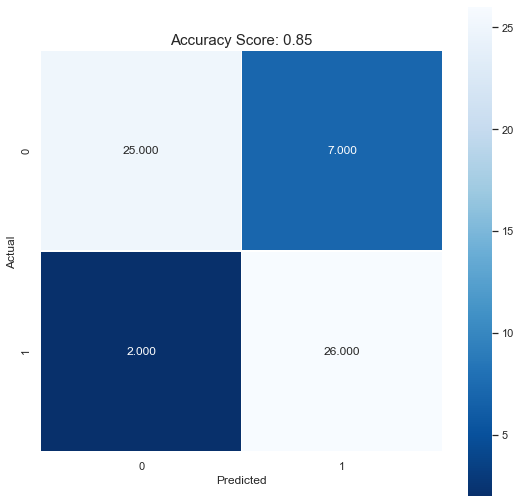

In [40]:
import seaborn as sb
plt.figure(figsize=(9,9))
sb.heatmap(logrcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [41]:
 print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.85        28

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In the terms of our data, the logistic regression shows that at a 85% accuracy
It is able to accurately predict 93% of positive identifications correctly when the subject has the disease, and is able to accurately predict 79% of positive identifications correctly when the subject does not have the disease
It is able to accurately predict 78% of actual people with the disease accurately, and is able to accurately predict 93% of actual people without the disease accurately

## SVM

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [43]:
parametres = [{'C':[0.001,0.1,1,10],'kernel':['rbf','linear']}]
grid = GridSearchCV(estimator=svm.SVC(),param_grid=parametres,scoring='accuracy')
grid.fit(x_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1, 'kernel': 'linear'}
Best Estimators:
 SVC(C=1, kernel='linear')


In [44]:
predictions = grid.predict(x_test)
score = accuracy_score(y_test, predictions)
print(score)

0.8666666666666667


In [45]:
SVMcm = confusion_matrix(y_test, predictions)
print(logrcm)

[[25  7]
 [ 2 26]]


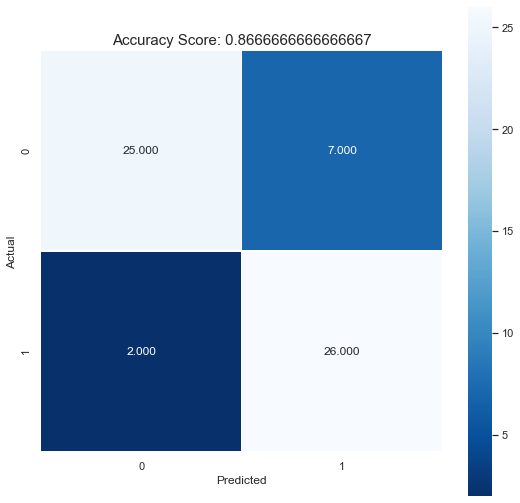

In [46]:
plt.figure(figsize=(9,9))
sb.heatmap(logrcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [47]:
 print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In the terms of our data, the support vector machine shows that at a 87% accuracy.
It is able to accurately predict 93% of positive identifications correctly when the subject has the disease, and is able to accurately predict 81% of positive identifications correctly when the subject does not have the disease
It is able to accurately predict 81% of actual people with the disease accurately, and is able to accurately predict 93% of actual people without the disease accurately

## K-nearest neighbor Algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [49]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [50]:
model.fit(x_train,y_train)
model.best_params_    

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [51]:
predict = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))

Accuracy Score:  0.8833333333333333


In [56]:
 print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



In the terms of our data, the support vector machine shows that at a 88% accuracy.
It is able to accurately predict 93% of positive identifications correctly when the subject has the disease, and is able to accurately predict 84% of positive identifications correctly when the subject does not have the disease
It is able to accurately predict 84% of actual people with the disease accurately, and is able to accurately predict 93% of actual people without the disease accurately

<h2>Random Forest and Decision Tree</h2>

In [57]:
newData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [58]:
print("The shape of our features is:", newData.shape)

The shape of our features is: (296, 14)


In [59]:
labels = np.array(newData['target'])
features = newData.drop('target', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [60]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, train_size = 0.7, random_state = 88, stratify = labels)

In [61]:
print("Training Features Shape: ", train_features.shape)
print("Training Labels Shape: ", train_labels.shape)
print("Testing Features Shape: ", test_features.shape)
print("Testing Labels Shape: ", test_labels.shape)

Training Features Shape:  (207, 13)
Training Labels Shape:  (207,)
Testing Features Shape:  (89, 13)
Testing Labels Shape:  (89,)


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 88)
rf.fit(train_features, train_labels);

In [63]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print("Mean Absolute Error:", round(np.mean(errors), 2), "degrees." )

Mean Absolute Error: 0.27 degrees.


In [64]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [66]:
#This opens the Decision Tree
from PIL import Image 
im = Image.open(r"tree.png")
im.show() 

With this random forest we are more easily able to which factors have a more important impact on the predictability of our data based on their relative depth on the decision tree. With this tree we are able to surmise that one of the Information Gain of ca (number of vessels colored) is the highest making it the first split in the tree. From the tree we are able to see which combinations of parameters are more likely to either result in 0 (having the disease) or 1 (not having the disease)